In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from KDTree import Datapoint
from KDTree import KDTree
import pandas as pd

Creation of csv file from text file

In [ ]:
f = open('input_database.txt', 'r')
sr = None
color = 0
data = [["X", "Y", "Color"]]

for line in f:
    if line[0] == "*":
        continue
    if len(line) == 2:
        color = int(line)
        continue
    format_string = line[1:-2]
    div = format_string.split(',')
    data.append([float(div[0]), float(div[1]), color])

In [ ]:
import csv
with open("data.csv", "w", newline="") as csvfile:
    # Create a csv writer object
    writer = csv.writer(csvfile)
    # Write each row of data
    for row in data:
        writer.writerow(row)

Open Dataframe

In [2]:
df = pd.read_feather('big_data.feather')
df

,X,Y,Color
0,7720.982199,78867.188540,0
1,89627.028825,70071.537547,0
2,84361.871932,97117.551705,0
3,28595.067689,87388.534848,0
4,79024.626051,66595.629925,0
...,...,...,...
4110603,83068.359093,92309.391363,4
4110604,99697.775868,81796.458117,4
4110605,84735.387977,94289.931123,4
4110606,31389.814557,45703.015010,4


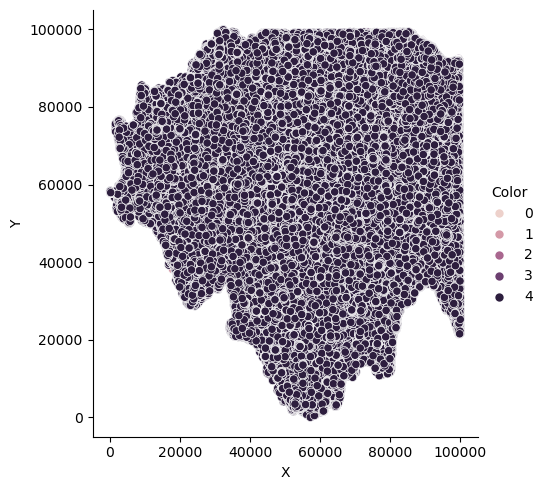

In [3]:
import seaborn as sns
sns.relplot(data=df, x="X", y="Y", hue="Color")

Construct KD-Tree

In [26]:
total_rows = 4110608
colors = {
    '0': {'color': 0, 'weight': 1725/total_rows},
    '1': {'color': 1, 'weight': 38080/total_rows},
    '2': {'color': 2, 'weight': 294728/total_rows},
    '3': {'color': 3, 'weight': 705193/total_rows},
    '4': {'color': 4, 'weight': 3070882/total_rows},
}
dp_colors1 = dict()
for row in colors.values():
    dp_colors1[str(row['color'])] = row['weight']

In [ ]:
datapoints1 = list()
for row in df.itertuples():
    dp1 = Datapoint(coordinate=[row.X, row.Y], color=str(row.Color))
    datapoints1.append(dp1)

In [ ]:
tree1 = KDTree()
tree1.build_tree(datapoints1, dp_colors1)

In [ ]:
results = {
    "0": 0,
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
}

for i in range(1000):
    result = None
    while result is None:
        random_x1 = round(random.uniform(0, 100000.0), 6)
        random_x2 = round(random.uniform(random_x1, 100000.0), 6)
        random_y1 = round(random.uniform(0, 100000.0), 6)
        random_y2 = round(random.uniform(random_y1, 100000.0), 6)
        result = tree1.level1_random_selection( ([random_x1, random_y1],[random_x2, random_y2]) )
    results[result] += 1

In [25]:
results

{'0': 0, '1': 955, '2': 0, '3': 0, '4': 45}

In [20]:
dp_colors1

{'0': 0.00041964595018547133,
 '1': 0.009263836395978406,
 '2': 0.07169936904710933,
 '3': 0.1715544269850105,
 '4': 0.7470627216217163}